### 사이킷런으로 수행하는 타이타닉 생존자 예측🚢

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanicDF = pd.read_csv('titanic.csv')
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 평균 나이로 대체
titanicDF['Age'].fillna(titanicDF['Age'].mean(), inplace = True)

# "N" 값으로 대체
titanicDF['Cabin'].fillna('N', inplace = True)
titanicDF['Embarked'].fillna('N', inplace = True)

print('데이터 세트 Null 값 개수 ', titanicDF.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [5]:
print(' Sex 값 분포 :\n', titanicDF['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanicDF['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanicDF['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# "Cabin" 속성의 앞 문자만 추출
titanicDF['Cabin'] = titanicDF['Cabin'].str[:1]
print(titanicDF['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


1️⃣ 성별에 따른 생존자 수 비교

In [7]:
titanicDF.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

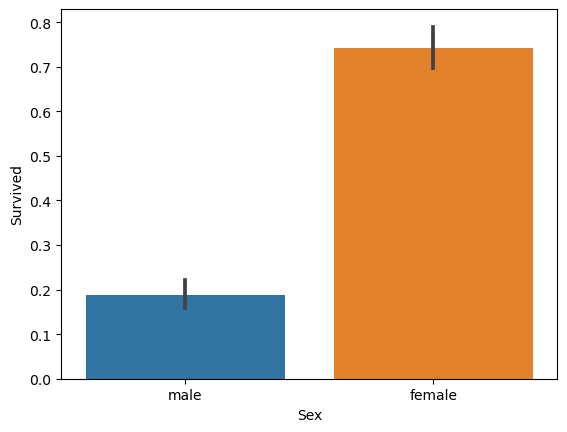

In [8]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanicDF)

🌟 여자는 314명 중 233명으로 약 74.2%가 생존

🌟 남자는 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존

2️⃣ 부자와 가난한 사람 간의 생존 확률

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

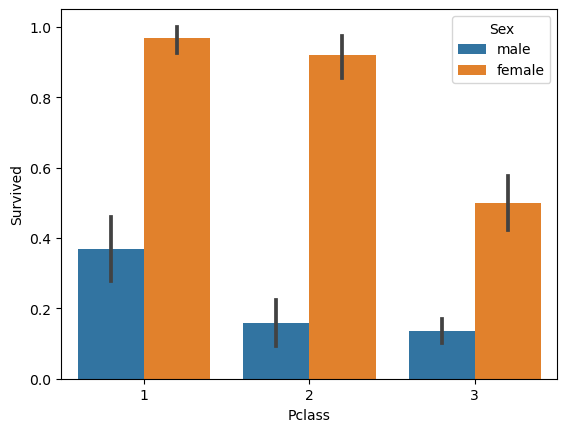

In [9]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanicDF)

🌟 여성의 경우 1, 2등실에 따른 생존 확률의 차이는 크지 않으나, 3등실의 경우 생존 확률이 상대적으로 많이 떨어짐

🌟 남성의 경우 1등실의 생존 확률이 2, 3등실의 생존 확률보다 월등히 높음

#### ✔ 입력 Age에 따라 구분 값을 반환하는 함수 설정
- 0 ~ 5세 : Baby
- 6 ~ 12세 : Child
- 13 ~ 18세 : Teenager
- 19 ~ 25세 : Student
- 26 ~ 35세 : Young Adult
- 36 ~ 60세 : Adult
- 61세 이상 : Elderly

In [10]:
def get_category(age):
    cat = ''

    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'

    return cat

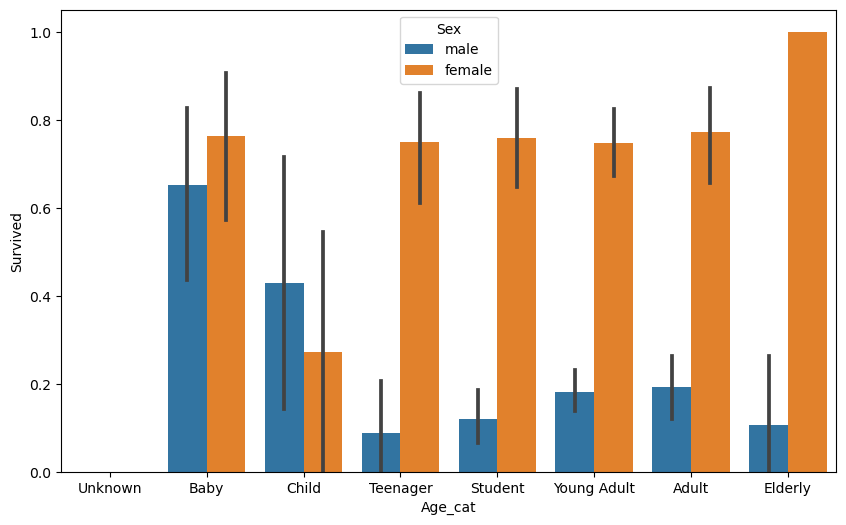

In [11]:
# 막대그래프의 크기 설정
plt.figure(figsize = (10, 6))

# x축의 값을 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정
# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanicDF['Age_cat'] = titanicDF['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanicDF, order = group_names)
titanicDF.drop('Age_cat', axis = 1, inplace = True)

🌟 여자 Baby와 Elderly의 생존 확률이 높았으나 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음

#### ✔ 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

In [14]:
titanicDF = encode_features(titanicDF)
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


🌟 Sex, Cabin, Embarked 속성이 숫자형으로 바뀜

In [15]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanicDF['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

✔ 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출

In [16]:
titanicDF = pd.read_csv('titanic.csv')
y_titanic_df = titanicDF['Survived']
X_titanic_df = titanicDF.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [24]:
# 테스트 데이터 세트 크기는 전체의 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11) 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

In [29]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [30]:
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도: 0.8547


In [31]:
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8659


📌 교차 검증으로 결정 트리 모델 평가

In [32]:
from sklearn.model_selection import KFold

In [33]:
def exec_kfold(clf, folds = 5):
    ''' 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성 '''
    kfold = KFold(n_splits = folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        ''' 학습과 검증 데이터를 가리키는 index 생성 '''
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        ''' Classifier 학습, 예측, 정확도 계산 '''
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

        ''' 5개 fold에서의 평균 정확도 계산 '''
        mean_score = np.mean(scores)
        print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


📌 cross_val_score() API 이용

In [34]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

In [39]:
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [40]:
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_estimator_)
print('GridSearchCV 최고 정확도 :', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터 : DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=11)
GridSearchCV 최고 정확도 : 0.7991825076332119


In [ ]:
# GridSearchCV 최적 하이퍼 파라미터